In [1]:
%pip install optuna 

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 133.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pickle
df1=pickle.load(open("../features.pkl","rb"))

In [4]:
df1

,participantId,activity,activity_count,browser_Chrome,browser_Safari,acceleration.x_mean,acceleration.x_var,acceleration.x_min,acceleration.x_max,acceleration.x_median,...,rotationRate.beta_mean,rotationRate.beta_var,rotationRate.beta_min,rotationRate.beta_max,rotationRate.beta_median,rotationRate.gamma_mean,rotationRate.gamma_var,rotationRate.gamma_min,rotationRate.gamma_max,rotationRate.gamma_median
0,10d83,sitting,60.0,1.0,0.0,0.008333,0.011624,-0.2,0.3,0.0,...,-0.355000,1.314720,-2.7,3.6,-0.45,0.015000,0.912483,-1.5,3.0,0.05
1,10d83,sitting,61.0,1.0,0.0,0.008197,0.011432,-0.2,0.3,0.0,...,-0.324590,1.349219,-2.7,3.6,-0.40,0.011475,0.898033,-1.5,3.0,0.00
2,10d83,sitting,60.0,1.0,0.0,0.008333,0.011624,-0.2,0.3,0.0,...,-0.300000,1.424746,-2.7,3.6,-0.40,0.038333,0.885116,-1.5,3.0,0.05
3,10d83,sitting,60.0,1.0,0.0,0.011667,0.011556,-0.2,0.3,0.0,...,-0.255000,1.473025,-2.7,3.6,-0.30,0.040000,0.882780,-1.5,3.0,0.05
4,10d83,sitting,60.0,1.0,0.0,0.015000,0.011466,-0.2,0.3,0.0,...,-0.201667,1.519489,-2.7,3.6,-0.30,0.006667,0.925040,-1.6,3.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108191,uspgb,sitting,60.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.185000,0.755534,-1.7,2.1,0.30,0.046667,0.002531,0.0,0.1,0.00
108192,uspgb,sitting,61.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.191803,0.745765,-1.7,2.1,0.30,0.045902,0.002525,0.0,0.1,0.00
108193,uspgb,sitting,60.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.160000,0.712271,-1.7,2.1,0.30,0.045000,0.002517,0.0,0.1,0.00
108194,uspgb,sitting,60.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.148333,0.691014,-1.7,2.1,0.30,0.043333,0.002497,0.0,0.1,0.00


In [59]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)


for train_idx, test_idx in splitter.split(y=df1.activity, X=df1.drop(columns=["activity","participantId"]), groups=df1.participantId):
    train, test = df1.iloc[train_idx], df1.iloc[test_idx]

In [60]:
test.participantId.unique()

array(['10d83', '11416'], dtype=object)

In [61]:
train.participantId.unique()

array(['11cc1', '12f77', '150c9', '152a7', '15b85', '16742', '18582',
       '191d4', '1a045', '1b682', '1b728', '1b949', '1dd54', '1e570',
       '1f683', 'uspgb'], dtype=object)

In [50]:
%pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
train_resampled

,participantId,activity_count,browser_Chrome,browser_Safari,acceleration.x_mean,acceleration.x_var,acceleration.x_min,acceleration.x_max,acceleration.x_median,acceleration.y_mean,...,rotationRate.beta_mean,rotationRate.beta_var,rotationRate.beta_min,rotationRate.beta_max,rotationRate.beta_median,rotationRate.gamma_mean,rotationRate.gamma_var,rotationRate.gamma_min,rotationRate.gamma_max,rotationRate.gamma_median
55249,11cc1,60.0,1.0,0.0,0.000000,0.000000,0.00,0.00,0.000,0.000000,...,-0.018333,0.001523,-0.10,0.000000,0.000,0.006667,0.000633,0.000000,0.10,0.000
106722,1f683,60.0,0.0,1.0,0.022167,0.001478,-0.04,0.12,0.020,0.022833,...,0.203000,0.872425,-1.50,4.160000,0.115,0.159667,0.370159,-0.950000,2.04,0.125
65868,15b85,60.0,0.0,1.0,0.012000,0.001518,-0.09,0.10,0.010,-0.029833,...,0.524833,1.194259,-1.32,3.910000,0.455,-0.322333,0.707208,-2.990000,1.54,-0.170
105017,1f683,60.0,0.0,1.0,0.043833,0.016963,-0.30,0.23,0.045,0.013833,...,-0.383833,2.384946,-3.37,3.000000,-0.995,-0.526167,5.018153,-5.590000,2.75,0.195
71771,18582,60.0,0.0,1.0,-0.001833,0.000097,-0.02,0.02,0.000,-0.002500,...,-0.016000,0.009011,-0.28,0.280000,-0.020,-0.002833,0.005285,-0.170000,0.16,-0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93224,1b949,9764.0,0.0,0.0,-0.050512,0.598809,-2.20,0.90,0.100,0.003400,...,1.685129,28.186988,-4.90,17.500000,0.100,-16.815117,116.809082,-39.599998,-3.30,-13.600
88848,1b949,5388.0,0.0,0.0,0.138456,0.016668,-0.10,0.40,0.100,0.009948,...,-1.800000,3.566037,-4.90,0.800000,-1.800,-8.599777,9.248243,-14.900000,-3.30,-8.200
98730,1b949,15270.0,0.0,0.0,-0.109653,0.488671,-2.20,0.90,0.100,-0.061938,...,7.208356,117.623593,-4.90,32.799999,2.900,-15.631604,98.187156,-39.599998,-3.30,-10.400
88096,1b949,4636.0,0.0,0.0,0.101812,0.009378,-0.10,0.40,0.100,-0.010440,...,-1.653840,3.918568,-4.90,0.800000,-0.600,-7.713546,5.057258,-13.600000,-3.30,-8.000


In [81]:
train.activity.factorize()

(array([0, 0, 0, ..., 0, 0, 0], shape=(59316,)),
 Index(['sitting', 'walking', 'standing'], dtype='object'))

In [91]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

X,y,groups= train.drop(columns=["activity","participantId"]), train.activity, train.participantId

cv = GroupKFold(n_splits=5)


def objective(trial):
    clf=Pipeline([ ("sample", SMOTE()) , ("clf",DecisionTreeClassifier(max_depth=trial.suggest_int('max_depth',1,10))),])
    return cross_val_score(clf,X,y,cv=cv, groups=groups, scoring="f1_macro").mean()

study= optuna.study.create_study(direction="maximize")
study.optimize(objective,n_trials=5)

[I 2025-07-08 14:12:53,040] A new study created in memory with name: no-name-d1019d01-d1e5-40a5-b493-ffbb373aa434
[I 2025-07-08 14:13:03,035] Trial 0 finished with value: 0.5120269078900506 and parameters: {'max_depth': 9}. Best is trial 0 with value: 0.5120269078900506.
[I 2025-07-08 14:13:11,513] Trial 1 finished with value: 0.48455491120050426 and parameters: {'max_depth': 6}. Best is trial 0 with value: 0.5120269078900506.
[I 2025-07-08 14:13:20,591] Trial 2 finished with value: 0.48554494349931365 and parameters: {'max_depth': 7}. Best is trial 0 with value: 0.5120269078900506.
[I 2025-07-08 14:13:26,170] Trial 3 finished with value: 0.3108271865780275 and parameters: {'max_depth': 2}. Best is trial 0 with value: 0.5120269078900506.
[I 2025-07-08 14:13:36,112] Trial 4 finished with value: 0.46691659162844623 and parameters: {'max_depth': 9}. Best is trial 0 with value: 0.5120269078900506.


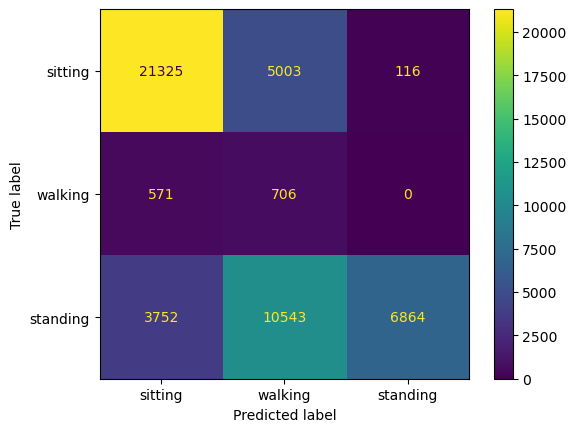

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf=DecisionTreeClassifier(max_depth=study.best_params["max_depth"])

clf.fit(train.drop(columns=["activity","participantId"]),train.activity)
cm = confusion_matrix(test.activity, clf.predict(test.drop(columns=["activity","participantId"])))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=train.activity.unique()).plot()

[Text(0.4326923076923077, 0.95, 'x[21] <= 0.815\ngini = 0.58\nsamples = 59316\nvalue = [30658.0, 6333.0, 22325.0]'),
 Text(0.16826923076923078, 0.85, 'x[26] <= 0.21\ngini = 0.155\nsamples = 31332\nvalue = [28699, 2456, 177]'),
 Text(0.3004807692307693, 0.8999999999999999, 'True  '),
 Text(0.07692307692307693, 0.75, 'x[31] <= 9.95\ngini = 0.002\nsamples = 26201\nvalue = [26171, 30, 0]'),
 Text(0.038461538461538464, 0.65, 'x[31] <= 9.85\ngini = 0.0\nsamples = 26078\nvalue = [26077, 1, 0]'),
 Text(0.019230769230769232, 0.55, 'gini = 0.0\nsamples = 26018\nvalue = [26018, 0, 0]'),
 Text(0.057692307692307696, 0.55, 'x[3] <= 0.041\ngini = 0.033\nsamples = 60\nvalue = [59, 1, 0]'),
 Text(0.038461538461538464, 0.45, 'gini = 0.0\nsamples = 59\nvalue = [59, 0, 0]'),
 Text(0.07692307692307693, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.11538461538461539, 0.65, 'x[5] <= -0.05\ngini = 0.36\nsamples = 123\nvalue = [94, 29, 0]'),
 Text(0.09615384615384616, 0.55, 'gini = 0.0\nsamples 

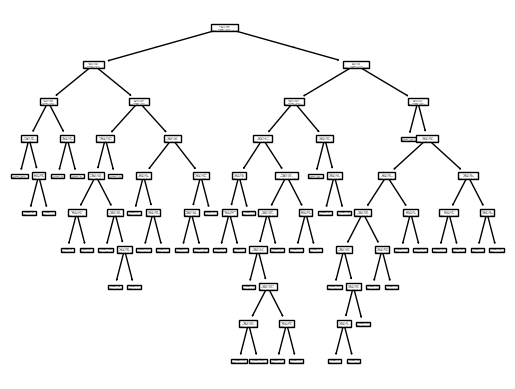

In [93]:
from sklearn import tree

tree.plot_tree(clf)

In [94]:
%pip install m2cgen

Note: you may need to restart the kernel to use updated packages.


In [95]:
import m2cgen as m2c
code = m2c.export_to_javascript(clf)


In [96]:
clf.feature_names_in_

array(['activity_count', 'browser_Chrome', 'browser_Safari',
       'acceleration.x_mean', 'acceleration.x_var', 'acceleration.x_min',
       'acceleration.x_max', 'acceleration.x_median',
       'acceleration.y_mean', 'acceleration.y_var', 'acceleration.y_min',
       'acceleration.y_max', 'acceleration.y_median',
       'acceleration.z_mean', 'acceleration.z_var', 'acceleration.z_min',
       'acceleration.z_max', 'acceleration.z_median',
       'accelerationIncludingGravity.x_mean',
       'accelerationIncludingGravity.x_var',
       'accelerationIncludingGravity.x_min',
       'accelerationIncludingGravity.x_max',
       'accelerationIncludingGravity.x_median',
       'accelerationIncludingGravity.y_mean',
       'accelerationIncludingGravity.y_var',
       'accelerationIncludingGravity.y_min',
       'accelerationIncludingGravity.y_max',
       'accelerationIncludingGravity.y_median',
       'accelerationIncludingGravity.z_mean',
       'accelerationIncludingGravity.z_var',
      

In [97]:
print(code)

function score(input) {
    var var0;
    if (input[21] <= 0.8149999976158142) {
        if (input[26] <= 0.21000000089406967) {
            if (input[31] <= 9.949999809265137) {
                if (input[31] <= 9.849999904632568) {
                    var0 = [1.0, 0.0, 0.0];
                } else {
                    if (input[3] <= 0.04083333257585764) {
                        var0 = [1.0, 0.0, 0.0];
                    } else {
                        var0 = [0.0, 1.0, 0.0];
                    }
                }
            } else {
                if (input[5] <= -0.05000000074505806) {
                    var0 = [0.0, 1.0, 0.0];
                } else {
                    var0 = [1.0, 0.0, 0.0];
                }
            }
        } else {
            if (input[31] <= 9.349999904632568) {
                if (input[36] <= 124.02499771118164) {
                    if (input[33] <= -2.3558332920074463) {
                        if (input[22] <= -0.9875000268220901) {
      